
# Vector Representations


## 0.1 Get `spacy`

In [2]:
import spacy.cli
spacy.cli.download("en_core_web_md")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


##0.2 Restart Runtime

## 0.3 Imports

In [3]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup

%matplotlib inline

import spacy
nlp = spacy.load("en_core_web_md")

##0.4 Clone the git repo
so we can access the files in the `/data` folder

In [4]:
# !git clone https://github.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP.git


Cloning into 'DS-Unit-4-Sprint-1-NLP'...
remote: Enumerating objects: 1742, done.
remote: Counting objects: 100% (210/210), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 1742 (delta 115), reused 157 (delta 88), pack-reused 1532
Receiving objects: 100% (1742/1742), 60.07 MiB | 14.88 MiB/s, done.
Resolving deltas: 100% (284/284), done.


## 1) Clean the Job Listings from indeed.com that contain the title "Data Scientist"

The file `job_listings.csv` is in the `data` folder for this module. <br>
Navigate to the `data` folder in the `DS-Unit-4-Sprint-1-NLP` folder icon in the left sidebar.
Find the path to `job_listings.csv` (all the way at the bottom of the list of files in `data`), by clicking on the "three dots" symbol to the right of its file icon.

In [5]:
data_path = 'data/job_listings.csv'
df = pd.read_csv(data_path)

In [6]:
df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


### Remove `HTML tags`

The text data in the description column is messy - it's full of html tags! <br>
Use the [`BeautifulSoup`](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column by removing html tags. <br>
* You will need to read through the `BeautifulSoup` documentation to accomplish this task. <br>
* As with any library, there is lots of documentation, but read only what you need!
* Don't spend more time than it takes to figure out how to remove html tags!


In [7]:
# removes HTML tags from the description

def remove_html(html_string):
    '''
    removes HTML tags in a string
    '''
    soup = BeautifulSoup(html_string, 'html.parser')
    text = soup.get_text() # extract all text out of HTML
    return text

In [8]:
df["clean_text"] = df.description.apply(lambda text: remove_html(text))

In [9]:
df.clean_text

0      b"Job Requirements:\nConceptual understanding ...
1      b'Job Description\n\nAs a Data Scientist 1, yo...
2      b'As a Data Scientist you will be working on c...
3      b'$4,969 - $6,756 a monthContractUnder the gen...
4      b'Location: USA \xe2\x80\x93 multiple location...
                             ...                        
421    b"About Us:\nWant to be part of a fantastic an...
422    b'InternshipAt Uber, we ignite opportunity by ...
423    b'$200,000 - $350,000 a yearA million people a...
424    b"SENIOR DATA SCIENTIST\nJOB DESCRIPTION\n\nAB...
425    b'Cerner Intelligence is a new, innovative org...
Name: clean_text, Length: 426, dtype: object

## 2) Use Spacy to tokenize the listings
Remove stop words, punctuation and spaces, and whatever else you want to remove

In [13]:
## YOUR CODE HERE
def tokenizer(text):
    """
    Uses spaCy language model to tokenize text.
    Token filters are used to exclude low quality tokens.

    Note
    ----
    Remember to check out the spacy docs to see which token flags are available for you to use
    https://spacy.io/api/token

    Input
    ----------
    text: string
        raw text document that needs to be tokenized

    Returns
    -------
    tokens: list of strings
    """
    n_regex = r"(.\\n)"
    text = re.sub(n_regex, " ", text)

    punct_regex = r"[^0-9a-zA-Z\s+]"
    text = re.sub(punct_regex, " ", text.lower())

    tokens = []

    for token in nlp(text):
        if (token.is_punct==False) & (token.is_stop==False) & (token.is_space==False) & (len(token.lemma_)>2):
            tokens.append(token.lemma_)

    return tokens

### Apply our tokenizer function via `pandas.apply()`

In [14]:
df["lemmas"] = df.clean_text.apply(tokenizer)

In [16]:
df["lemmas"][0]

['job',
 'requirement',
 'conceptual',
 'understanding',
 'machine',
 'learning',
 'model',
 'like',
 'nai',
 'xc2',
 'xa8ve',
 'bayes',
 'mean',
 'svm',
 'apriori',
 'linear',
 'logistic',
 'regression',
 'neural',
 'random',
 'forest',
 'decision',
 'tree',
 'hand',
 'experience',
 'intermediate',
 'expert',
 'level',
 'code',
 'skill',
 'python',
 'ability',
 'write',
 'function',
 'clean',
 'efficient',
 'data',
 'manipulation',
 'mandatory',
 'role',
 'exposure',
 'package',
 'like',
 'numpy',
 'scipy',
 'panda',
 'matplotlib',
 'etc',
 'python',
 'ggplot2',
 'dplyr',
 'tidyr',
 'ability',
 'communicate',
 'model',
 'finding',
 'technical',
 'non',
 'technical',
 'stake',
 'holder',
 'hand',
 'experience',
 'sql',
 'hive',
 'similar',
 'programming',
 'languag',
 'past',
 'work',
 'github',
 'kaggle',
 'publish',
 'articl',
 'master',
 'degree',
 'statistic',
 'mathematics',
 'computer',
 'science',
 'quant',
 'specific',
 'field',
 'apply']

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

- Instantiate a `CountVectorizer` object
- Pass the tokenizer that you created above as a parameter value into `CountVectorizer`
- Use `CountVectorizer` to create a *document-term matrix*
- Copy your *document-term matrix* into a `pandas` dataframe, getting the column names from the `CountVectorizer` object
- Consider using `CountVectorizer` parameters like `stop_words` and `max_df`, `min_df` to trim your results
    
Once you've created your `dtm` dataframe, you might notice that some (or many) of your features result from data that still needs more cleaning. Use this as an opportunity to iteratively improve your `tokenizer` function.

In [19]:
vect = CountVectorizer(stop_words='english', ngram_range=(1,2), max_features=100, tokenizer=tokenizer)

dtm_tf = vect.fit_transform(df['clean_text'])# Here, tf stands for "term frequency, i.e. counts for each term"
dtm_tf = pd.DataFrame(data=dtm_tf.toarray(), columns=vect.get_feature_names_out())

In [20]:
dtm_tf.head()

,ability,advanced,algorithm,analysis,analytic,analytical,analyze,apply,base,build,...,tool,use,work,world,x80,x80 x99s,x99s,xe2,xe2 x80,year
0,2,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,1,1,0,1,0,0,0,1,...,1,0,6,2,8,2,2,8,8,1
2,1,1,1,0,1,1,1,1,0,1,...,0,0,2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,1,2,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,1


## 4) Visualize the most common word counts in a barplot

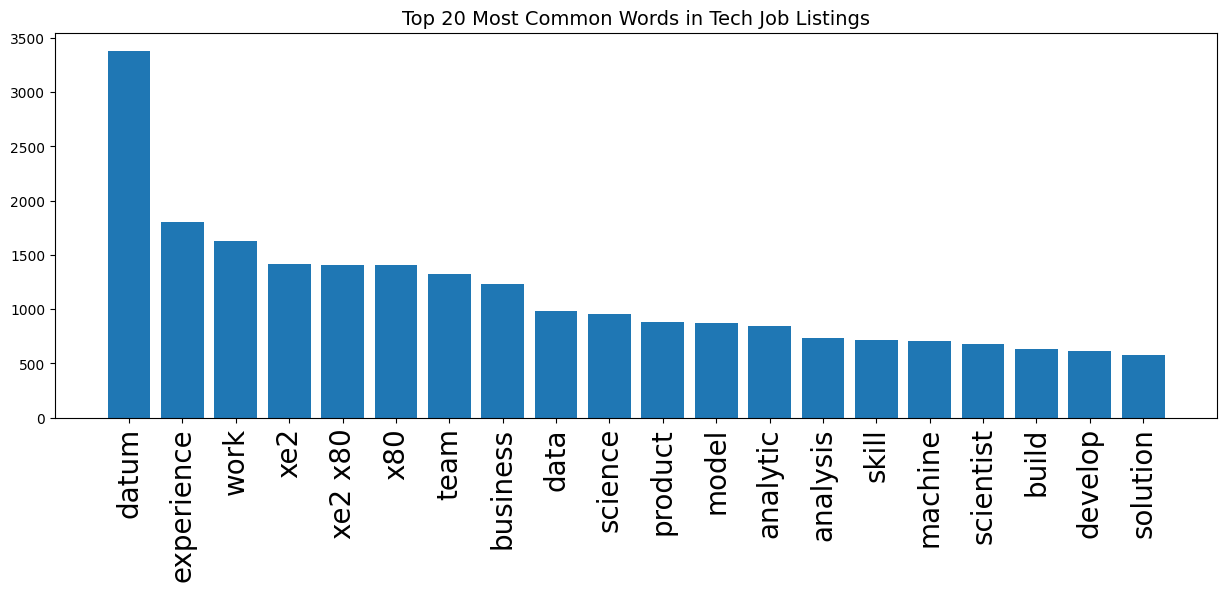

In [21]:
###BEGIN SOLUTION
# COMPLETE THE CODE IN THIS CELL
top_n = 20
# sum the term counts in each column of the dtm_tf data frame and then sort in descending order
sorted_terms = dtm_tf.sum().sort_values(ascending=False)[:20]

plt.figure(figsize=(15,5))
plt.xticks(rotation=90, fontsize=20)
plt.bar(sorted_terms.index, sorted_terms)
plt.title(f"Top {top_n} Most Common Words in Tech Job Listings", fontsize=14);
###END SOLUTION

## 5) Use Scikit-Learn's `TfidfVectorizer` to get a TF-IDF feature matrix

- Instantiate a `TfidfVectorizer` object
- Pass the tokenizer that you created above as a parameter value into `TfidfVectorizer`
- Use `TfidfVectorizer` to create a *document-term matrix*
- Copy your *document-term matrix* into a `pandas` dataframe, getting the column names from the `TfidfVectorizer` object


In [23]:
###BEGIN SOLUTION
tfidf_vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_features=100, tokenizer=tokenizer)
dtm_tfidf = tfidf_vect.fit_transform(df['clean_text'])
dtm_tfidf = pd.DataFrame(data=dtm_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out())
###END SOLUTION

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [24]:
dtm_tfidf

,ability,advanced,algorithm,analysis,analytic,analytical,analyze,apply,base,build,...,tool,use,work,world,x80,x80 x99s,x99s,xe2,xe2 x80,year
0,0.360845,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.185199,0.000000,0.000000,...,0.000000,0.000000,0.130390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.048909,0.000000,0.060927,0.043653,0.000000,0.058103,0.000000,0.000000,0.000000,0.045085,...,0.047421,0.000000,0.212077,0.109779,0.334976,0.098841,0.098841,0.334162,0.334976,0.042076
2,0.133810,0.166690,0.166690,0.000000,0.130071,0.158963,0.169251,0.137352,0.000000,0.123348,...,0.000000,0.000000,0.193407,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.196477,0.000000,0.000000,0.000000,...,0.000000,0.188921,0.224519,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.133635
4,0.000000,0.000000,0.000000,0.000000,0.299230,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.263540,0.000000,0.000000,0.262899,0.263540,0.264827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0.090051,0.000000,0.000000,0.000000,0.000000,0.000000,0.170854,0.138653,0.220350,0.041506,...,0.043656,0.000000,0.032540,0.000000,0.154190,0.090993,0.090993,0.153815,0.154190,0.154943
422,0.000000,0.000000,0.099015,0.070943,0.000000,0.000000,0.000000,0.000000,0.000000,0.146540,...,0.077066,0.096670,0.172328,0.267610,0.068048,0.080316,0.080316,0.067883,0.068048,0.000000
423,0.000000,0.314750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.232911,...,0.163319,0.102431,0.000000,0.283560,0.072104,0.085102,0.085102,0.071928,0.072104,0.072456
424,0.000000,0.000000,0.000000,0.093245,0.000000,0.000000,0.132142,0.160856,0.063909,0.000000,...,0.000000,0.000000,0.188752,0.058623,0.089440,0.052782,0.052782,0.089223,0.089440,0.044939


Stretch: see if you can make a visualization of this TF-IDF Document-Term  matrix, as you did in Part 3 for the CountVectorizer Document-Term matrix, i.e. using a barplot.

In [26]:
import seaborn as sns

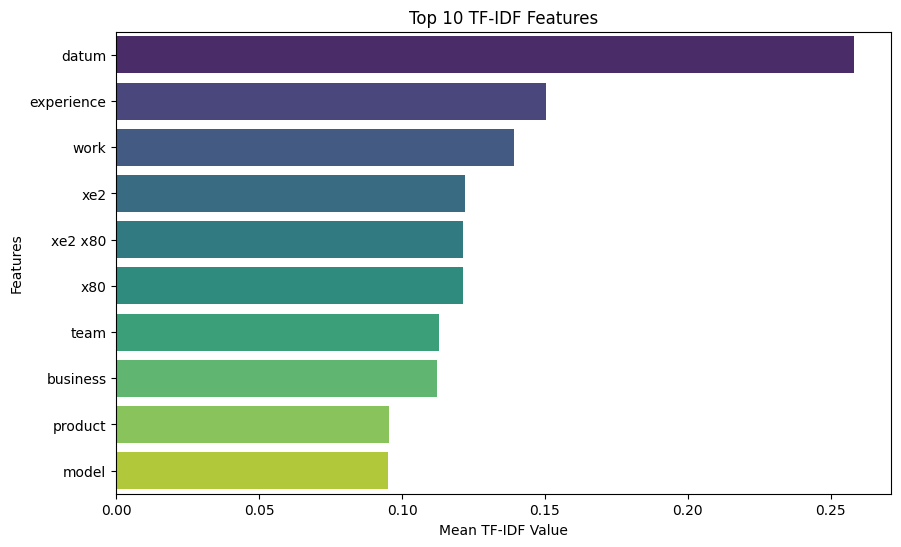

In [29]:
# Calculate the mean TF-IDF value for each feature across all documents
mean_tfidf = dtm_tfidf.mean(axis=0)

# Sort features by mean TF-IDF values in descending order
sorted_features = mean_tfidf.sort_values(ascending=False)

# Number of top features to display in the barplot
top_n = 10

# Select the top N features
top_features = sorted_features[:top_n]

# Create a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
plt.title(f'Top {top_n} TF-IDF Features')
plt.xlabel('Mean TF-IDF Value')
plt.ylabel('Features')
plt.show()

## 6) Create a `NearestNeighbor` Model for the Data Science job listings
Write a some text that describes your ideal Data Science job, and query the model to identify jobs with similar descriptions!

In [31]:
ideal_ds_job_query=['''140k for an entry level data scientist with more than 1 year of experience,
                    flexible schedule, work from home, full cover insurance including dental,
                    grow in the field, unlimited time off, 8 hour work days, no overtime, cool teammates, 401 matching''']


In [32]:
# vectorize your ideal job description using your fitted tfidf vectorizer
ideal_job_vector = tfidf_vect.transform(ideal_ds_job_query).toarray()

# fit NearestNeighbors model to the Indeed reviews document-term matrix that you created
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm_tfidf)

# get top_n_neigh distances and review indices for reviews that are closest to your ideal job
n_dist, n_ind = nn.kneighbors(ideal_job_vector)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [33]:
n_dist, n_ind

(array([[0.85074256, 0.85074256, 0.97097716, 0.97097716, 0.9966642 ]]),
 array([[149, 343,  78, 312,  29]]))

## Stretch Goals: do one of more of these that strike your fancy!

 - Repeat Part 6, but this time using spacy's word embeddings to represent documents as vectors. Remember, to form a document vector from spacy word embeddings, you average together the word embedding vectors of all the words in the document, so the document vector will have the same dimensionality as the word embeddings, namely 300 dimensions. Do you notice any difference in the results?
 - Watch Josh Starmer's video [StatQuest: Principal Component Analysis (PCA), Step-by-Step](https://www.youtube.com/watch?v=FgakZw6K1QQ). Or read [Daniela Witten's tweetstorm](https://twitter.com/womeninstat/status/1285610321747611653?lang=en) on Singular Value Decomposition (SVD). Now go back and review the section "Can we visualize word vectors?" from the [lecture video](https://drive.google.com/file/d/1QuwkO2Uj5sONFtqCk0_d2zrks2I6stkN/view?usp=sharing). Write a brief description of your understanding of Principal Components Analysis, and how it was used to visualize word vectors. Do your own experiments to explore relationships of words in two dimensions. Write a summary of what you discovered.

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings?
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. Hint: compose a query that references a number of tech stack items. How are those items distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this; algorithms that depend on Euclidean distance break down with high dimensional data. Do a bit of research to see if you can identify a suitable clustering algorithm.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for.